In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


It is a classification problem. String values to be encoded. There are no NaN values.

In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

since all the data is categorical need to convert it into numeric using Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


 All the column values are converted to ordinal. veil_type is 0 and not contributing  to the data so will remove it.

In [10]:
df['veil-type'].unique()

array([0])

In [11]:
df=df.drop(["veil-type"],axis=1)

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [13]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

EDA:

Univariate Analysis:

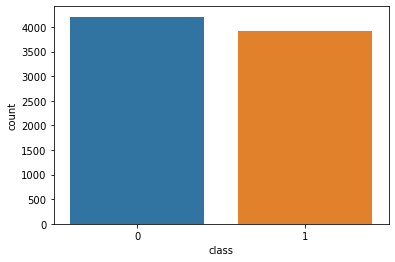

In [14]:
sns.countplot(df['class']);

## Distribution Plot to check data distribution (Skewness)

<AxesSubplot:xlabel='cap-shape', ylabel='Density'>

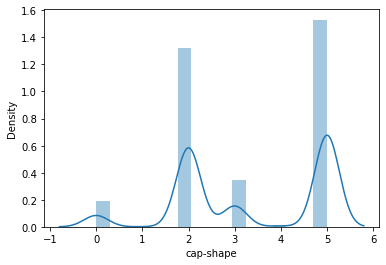

In [15]:
sns.distplot(df["cap-shape"])

<AxesSubplot:xlabel='cap-surface', ylabel='Density'>

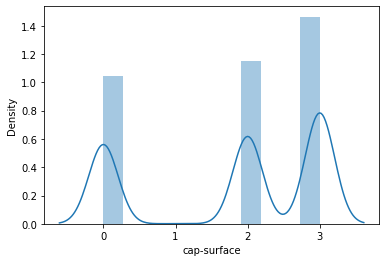

In [16]:
sns.distplot(df["cap-surface"])

<AxesSubplot:xlabel='cap-color', ylabel='Density'>

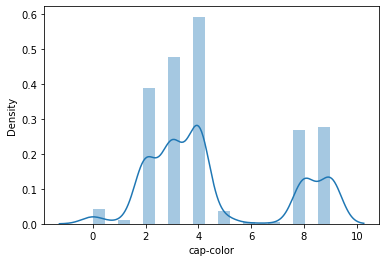

In [17]:
sns.distplot(df["cap-color"])

<AxesSubplot:xlabel='bruises', ylabel='Density'>

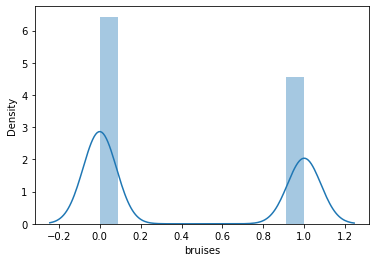

In [18]:
sns.distplot(df["bruises"])

<AxesSubplot:xlabel='odor', ylabel='Density'>

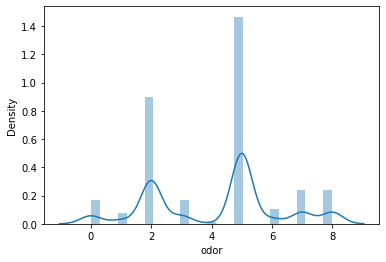

In [19]:
sns.distplot(df["odor"])

<AxesSubplot:xlabel='gill-attachment', ylabel='Density'>

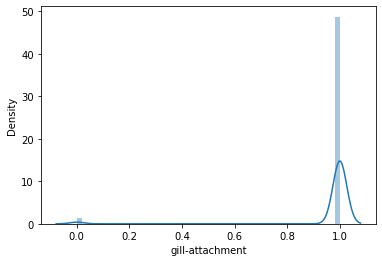

In [20]:
sns.distplot(df["gill-attachment"])

<AxesSubplot:xlabel='gill-spacing', ylabel='Density'>

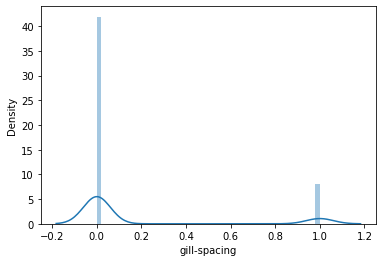

In [21]:
sns.distplot(df["gill-spacing"])

<AxesSubplot:xlabel='gill-size', ylabel='Density'>

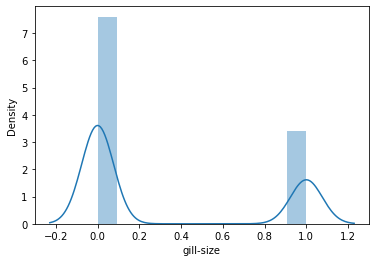

In [22]:
sns.distplot(df["gill-size"])

<AxesSubplot:xlabel='gill-color', ylabel='Density'>

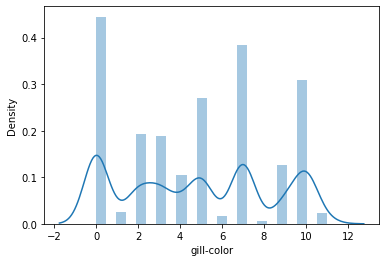

In [23]:
sns.distplot(df["gill-color"])

<AxesSubplot:xlabel='stalk-shape', ylabel='Density'>

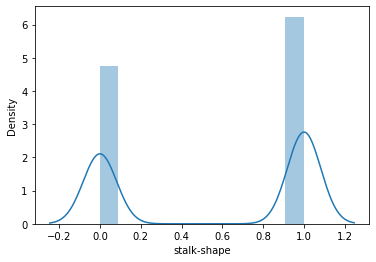

In [24]:
sns.distplot(df["stalk-shape"])

<AxesSubplot:xlabel='stalk-root', ylabel='Density'>

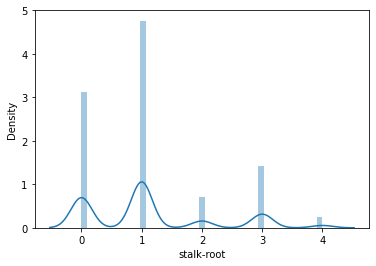

In [25]:
sns.distplot(df["stalk-root"])

<AxesSubplot:xlabel='stalk-surface-above-ring', ylabel='Density'>

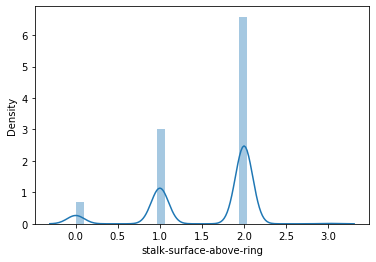

In [26]:
sns.distplot(df["stalk-surface-above-ring"])

<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='Density'>

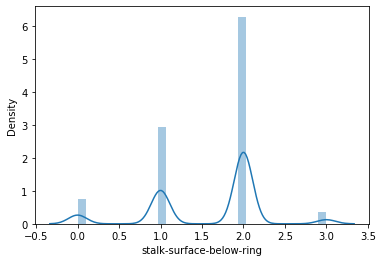

In [27]:
sns.distplot(df["stalk-surface-below-ring"])

<AxesSubplot:xlabel='stalk-color-above-ring', ylabel='Density'>

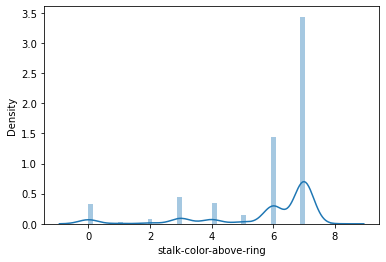

In [28]:
sns.distplot(df["stalk-color-above-ring"])

<AxesSubplot:xlabel='stalk-color-below-ring', ylabel='Density'>

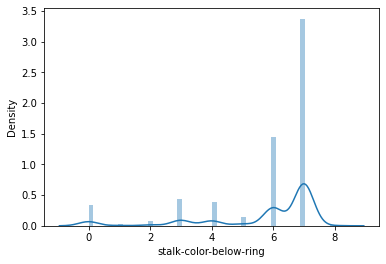

In [29]:
sns.distplot(df["stalk-color-below-ring"])

<AxesSubplot:xlabel='veil-color', ylabel='Density'>

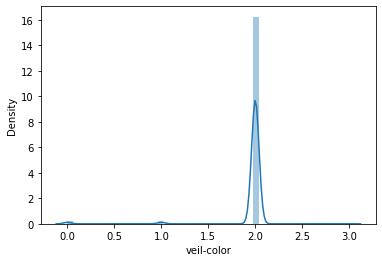

In [30]:
sns.distplot(df["veil-color"])

<AxesSubplot:xlabel='ring-number', ylabel='Density'>

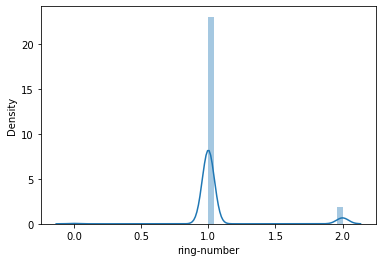

In [31]:
sns.distplot(df["ring-number"])

<AxesSubplot:xlabel='ring-type', ylabel='Density'>

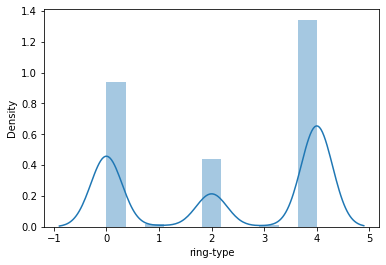

In [32]:
sns.distplot(df["ring-type"])

<AxesSubplot:xlabel='spore-print-color', ylabel='Density'>

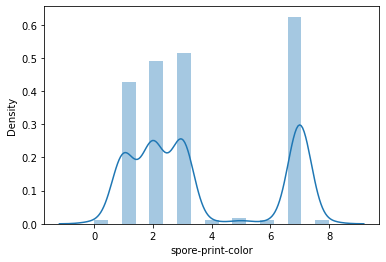

In [33]:
sns.distplot(df["spore-print-color"])

<AxesSubplot:xlabel='population', ylabel='Density'>

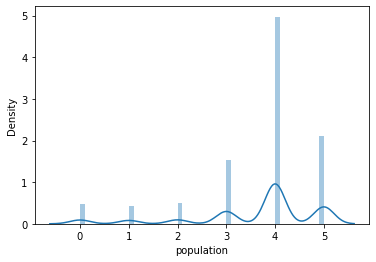

In [34]:
sns.distplot(df["population"])

<AxesSubplot:xlabel='habitat', ylabel='Density'>

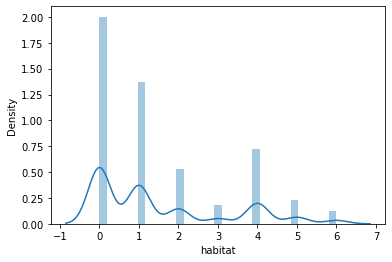

In [35]:
sns.distplot(df["habitat"])

## Box Plot to check Outliers

<AxesSubplot:xlabel='cap-shape'>

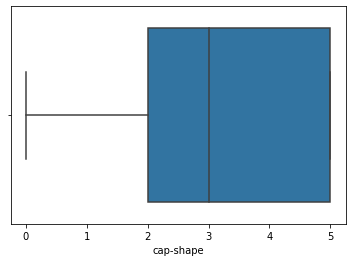

In [36]:
sns.boxplot(df["cap-shape"])

<AxesSubplot:xlabel='cap-surface'>

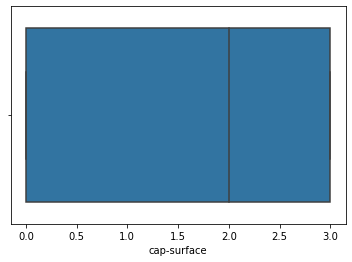

In [37]:
sns.boxplot(df["cap-surface"])

<AxesSubplot:xlabel='cap-color'>

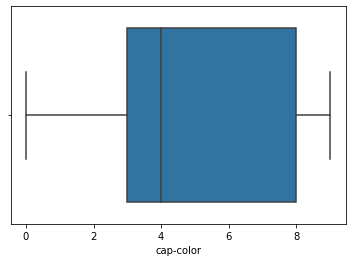

In [38]:
sns.boxplot(df["cap-color"])

<AxesSubplot:xlabel='bruises'>

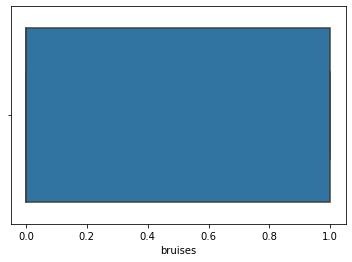

In [39]:
sns.boxplot(df["bruises"])

<AxesSubplot:xlabel='odor'>

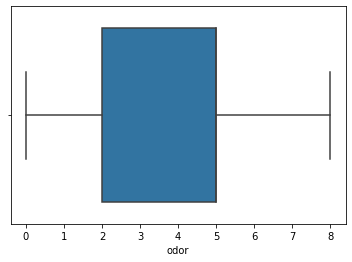

In [40]:
sns.boxplot(df["odor"])

<AxesSubplot:xlabel='gill-attachment'>

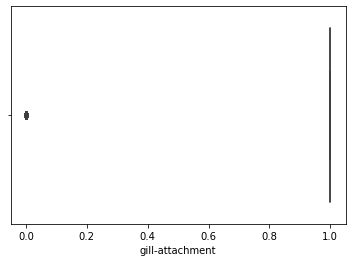

In [41]:
sns.boxplot(df["gill-attachment"])

<AxesSubplot:xlabel='gill-spacing'>

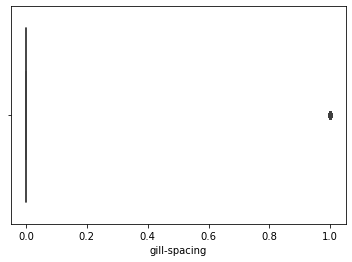

In [42]:
sns.boxplot(df["gill-spacing"])

<AxesSubplot:xlabel='gill-size'>

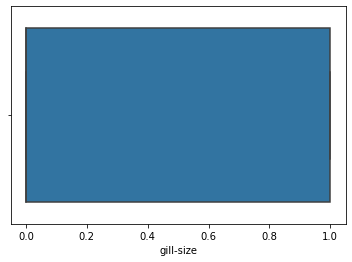

In [43]:
sns.boxplot(df["gill-size"])

<AxesSubplot:xlabel='gill-color'>

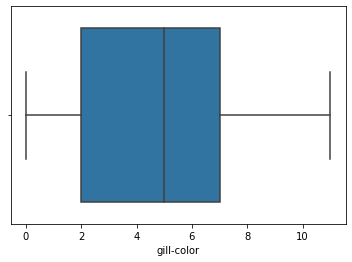

In [44]:
sns.boxplot(df["gill-color"])

<AxesSubplot:xlabel='stalk-shape'>

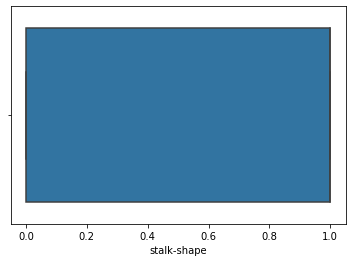

In [45]:
sns.boxplot(df["stalk-shape"])

<AxesSubplot:xlabel='stalk-root'>

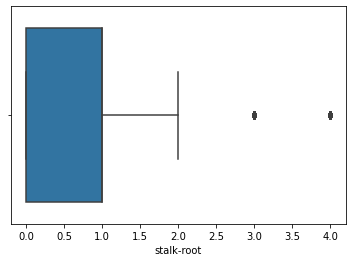

In [46]:
sns.boxplot(df["stalk-root"])

<AxesSubplot:xlabel='stalk-surface-above-ring'>

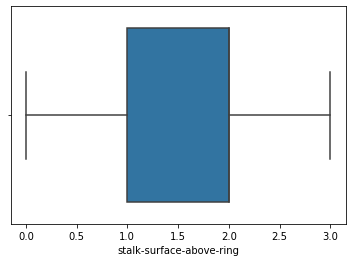

In [47]:
sns.boxplot(df["stalk-surface-above-ring"])

<AxesSubplot:xlabel='stalk-surface-below-ring'>

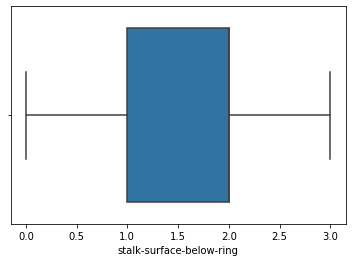

In [48]:
sns.boxplot(df["stalk-surface-below-ring"])

<AxesSubplot:xlabel='stalk-color-above-ring'>

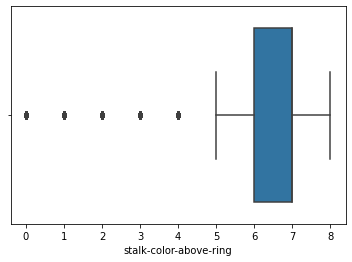

In [49]:
sns.boxplot(df["stalk-color-above-ring"])

<AxesSubplot:xlabel='stalk-color-below-ring'>

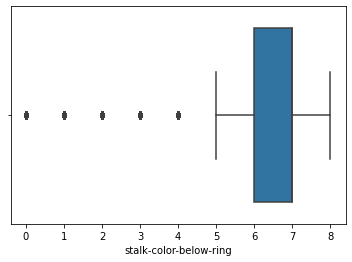

In [50]:
sns.boxplot(df["stalk-color-below-ring"])

<AxesSubplot:xlabel='veil-color'>

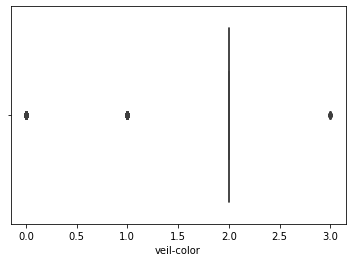

In [51]:
sns.boxplot(df["veil-color"])

<AxesSubplot:xlabel='ring-number'>

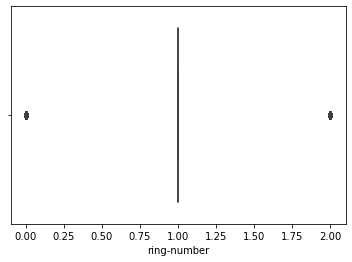

In [52]:
sns.boxplot(df["ring-number"])

<AxesSubplot:xlabel='ring-type'>

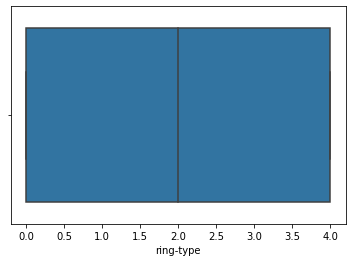

In [53]:
sns.boxplot(df["ring-type"])

<AxesSubplot:xlabel='spore-print-color'>

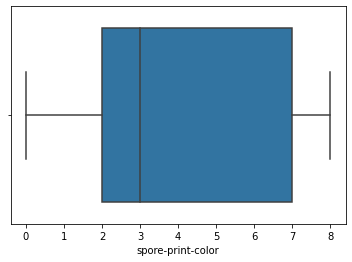

In [54]:
sns.boxplot(df["spore-print-color"])

<AxesSubplot:xlabel='population'>

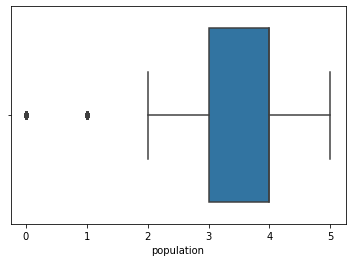

In [55]:
sns.boxplot(df["population"])

<AxesSubplot:xlabel='habitat'>

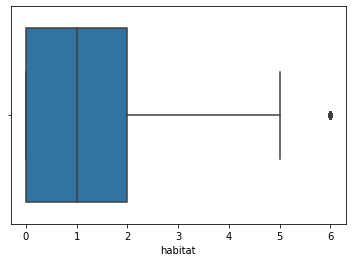

In [56]:
sns.boxplot(df["habitat"])

### MultiVariate Analysis

In [ ]:
sns.pairplot(df, diag_kind="kde")

In [57]:
cor=df.corr()
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [58]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


<AxesSubplot:>

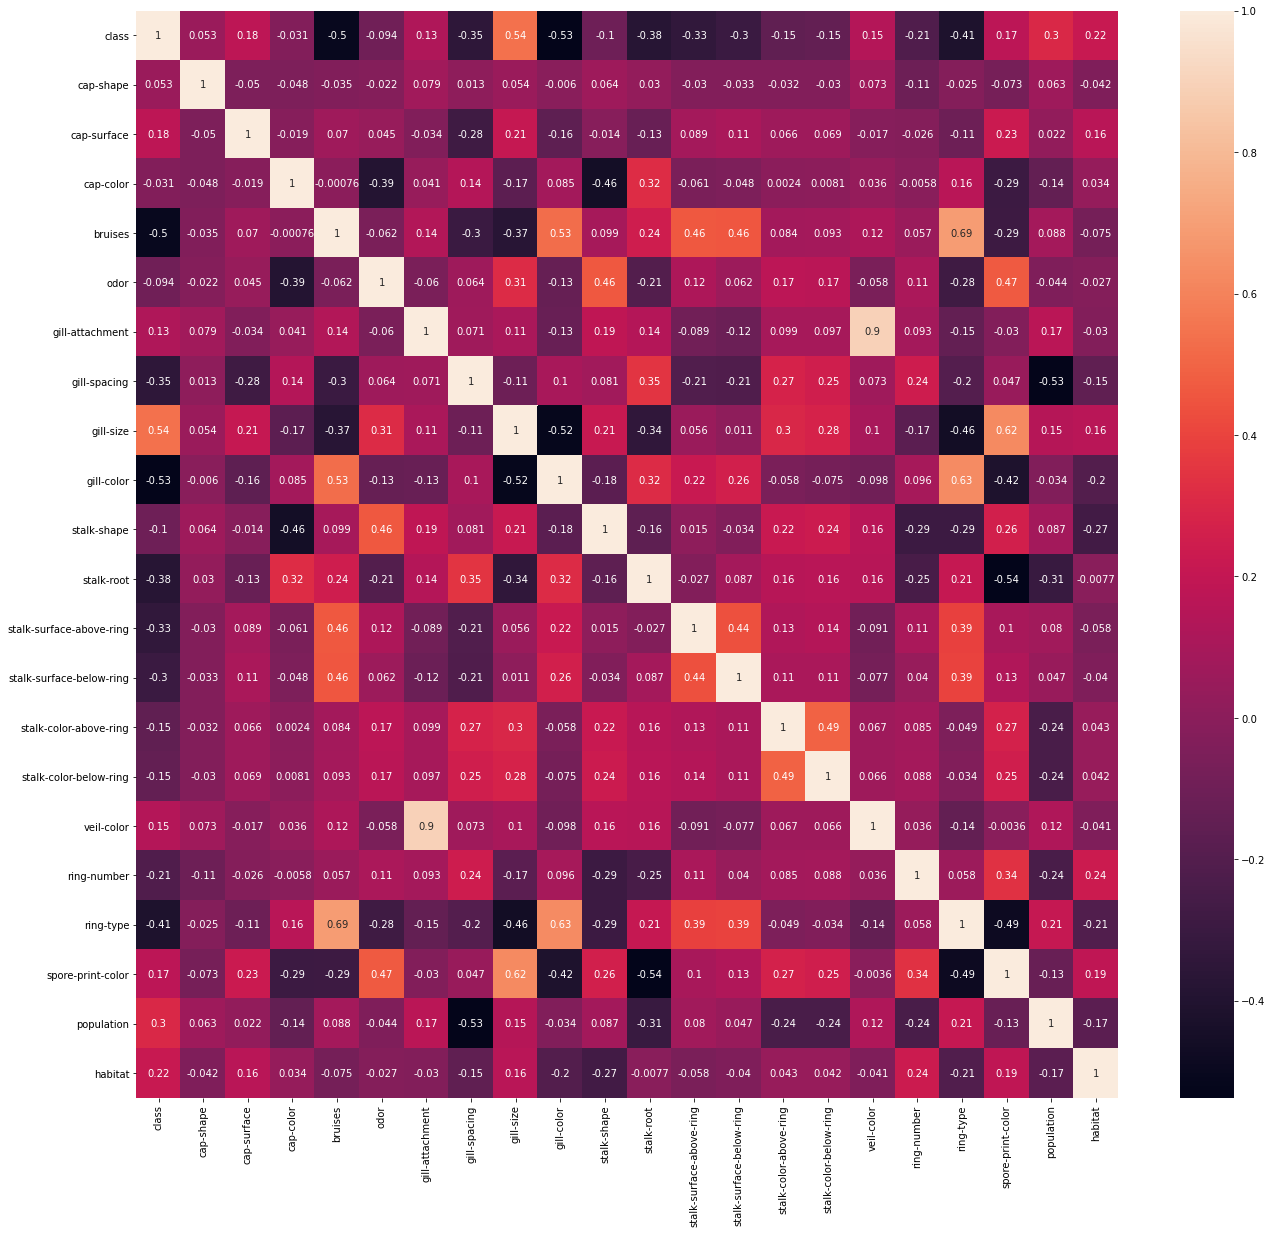

In [59]:
fig, ax_size = plt.subplots(figsize=(22,20))
sns.heatmap(cor,annot=True,ax=ax_size)

### Variance Inflation Factor

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)

                     feature         VIF
0                      class    7.320778
1                  cap-shape    5.464170
2                cap-surface    3.970695
3                  cap-color    5.958756
4                    bruises    9.277313
5                       odor    9.052766
6            gill-attachment  256.849199
7               gill-spacing    5.241245
8                  gill-size    7.062200
9                 gill-color    6.308226
10               stalk-shape    9.245052
11                stalk-root    8.236343
12  stalk-surface-above-ring   12.664088
13  stalk-surface-below-ring   11.868155
14    stalk-color-above-ring   17.194225
15    stalk-color-below-ring   17.223440
16                veil-color  301.677186
17               ring-number   65.807046
18                 ring-type   13.558091
19         spore-print-color   17.632195
20                population   21.435080
21                   habitat    2.837399


gill-attachment,veil-color,ring-number features are with high VIF and are highly correlated. Thus dropping these 3

In [91]:
df.drop(['gill-attachment','veil-color','ring-number'],axis=1,inplace=True)

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,3,2,2,7,7,4,2,3,5
1,0,5,2,9,1,0,0,0,4,0,2,2,2,7,7,4,3,2,1
2,0,0,2,8,1,3,0,0,5,0,2,2,2,7,7,4,3,2,3
3,1,5,3,8,1,6,0,1,5,0,3,2,2,7,7,4,2,3,5
4,0,5,2,3,0,5,1,0,4,1,3,2,2,7,7,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,11,0,0,2,2,5,5,4,0,1,2
8120,0,5,2,4,0,5,0,0,11,0,0,2,2,5,5,4,0,4,2
8121,0,2,2,4,0,5,0,0,5,0,0,2,2,5,5,4,0,1,2
8122,1,3,3,4,0,8,0,1,0,1,0,2,1,7,7,0,7,4,2


In [92]:
df.shape

(8124, 19)

### Outliers Removal

In [93]:
from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1) ]

In [94]:
new_df.shape

(7404, 19)

In [95]:
df.shape

(8124, 19)

In [96]:
7404/8124*100

91.1373707533235

outlier removal with zscore is deleting 9 % data (> 8%). So not removing the outliers.

### Skewness

In [97]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Splitting the data into x and y

In [98]:
x=df.drop("class",axis=1)
y=df["class"]

### Scaling

In [99]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_State ",maxRS)

Best accuracy is 1.0  on Random_State  1


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [103]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [104]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [105]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       1.00      0.97      0.99      1202

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



### Cross Validation Score Calculation

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9197192876089428


In [108]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8920146267525577


In [109]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.8425230011367942


Difference between Model accuracy and Cross Validation Score:

DTC - 100 - 92 = 8,
RFC - 100 - 89 = 11,
SV  - 99  - 84 = 15

Decision Tree Classifier has least difference

### Hyper Parameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter = {'max_depth': np.arange(2, 10),
             'criterion':['gini','entropy'],
             'splitter':['best','random'],
             'max_features':['auto','sqrt','log2']}

In [112]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [113]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [114]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'splitter': 'best'}

### Predictions: Predicting some of the test results (x_test) and matching with actual (y_test)

In [115]:
preds = DTC.predict(x_test)
print(preds[:40])
print(y_test[:40].values)
# 0 - Edible
# 1 - Poisonous

[0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1
 0 1 1]
[0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1
 0 1 1]


The predicted and true values match 100%

### Final Model Creation

In [116]:
Final_mod = DecisionTreeClassifier(criterion='gini', max_depth= 9, max_features='log2',splitter='best')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

99.83593109105826


### Saving the Model

In [117]:
import joblib
joblib.dump(Final_mod,"MushroomProject_FinalModel.pkl")

['MushroomProject_FinalModel.pkl']